In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_57 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1488 - accuracy: 0.3667
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 1.0863 - accuracy: 0.3333
Epoch 3/100
12/12 [==============================] - 0s

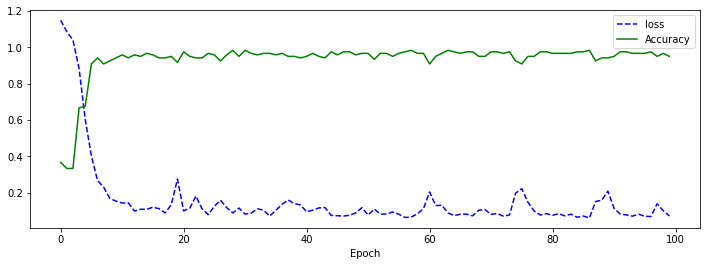

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = np.loadtxt('/content/gdrive/My Drive/4학년 2학기 강의/실감응용인공지능/Iris-training.csv', delimiter=',', skiprows=1, unpack=True, dtype=np.float32)
x_data = np.transpose(data[1:5]) # 첫번째 행부터 5개
y_data = np.transpose(data[5:]) # 5번째 행부터 마지막 행까지

# 모델 정의
model = tf.keras.Sequential()
model.add(Dense(input_dim=4, units=10, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))

# 3개의 출력 유닛을 가진 소프트맥스 층을 추가
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) # Adam 사용

model.summary()

history = model.fit(x_data, y_data, epochs=100, batch_size=10)

# 전체 모델을 HDF5 파일로 저장합니다
model.save("/content/gdrive/My Drive/4학년 2학기 강의/실감응용인공지능/my_model.h5")

print("=============weights==========")
for weight in model.weights:
  print(weight)

print("=============test results==========")
print(x_data)
# 모델 사용해서 결과 예측해보기
print(model.predict(x_data))
# 모델 사용해서 테스트 데이터로 성능 평가하기 (loss[0]와 Accuracy[1])
print("\n Accuracy: %.4f" % (model.evaluate(x_data, y_data)[1])) # list index
# model.evaluate() [0]은 loss리턴, [1]은 accuracy리턴
print("===================================")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행1열의 첫 번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') #loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') #accuracy는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# 바퀴와 날개의 유무에 따라, '배', '자동차', '비행기'로 분류하는 신경망 모델
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

data = np.loadtxt('/content/gdrive/My Drive/4학년 2학기 강의/실감응용인공지능/Iris-test.csv', delimiter=',', skiprows=1, unpack=True, dtype=np.float32)
x_data = np.transpose(data[1:5])
y_data = np.transpose(data[5:])

# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model = keras.models.load_model("/content/gdrive/My Drive/4학년 2학기 강의/실감응용인공지능/my_model.h5")
new_model.summary()

loss, acc = new_model.evaluate(x_data, y_data, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_57 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0127 - accuracy: 1.0000
복원된 모델의 정확도: 100.00%
